In [133]:
# Importing all the necessary data

import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn import preprocessing
from sklearn.neighbors import NearestNeighbors
from sklearn.cluster import MeanShift
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

# Health Data - Visualization and Logistic Regression

In [2]:
df = pd.read_csv("heart.csv")

In [3]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [5]:
df.columns.values

array(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg',
       'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype=object)

In [4]:
df.target.value_counts()


1    165
0    138
Name: target, dtype: int64

In [5]:
print("Percentage that have heart disease: {}".format((len(df[df.target == 1]) / len(df.target) * 100)))
print("Percentage that have heart disease: {}".format((len(df[df.target == 0]) / len(df.target) * 100)))

# The target class seems to be slightly imbalanced 

Percentage that have heart disease: 54.45544554455446
Percentage that have heart disease: 45.54455445544555


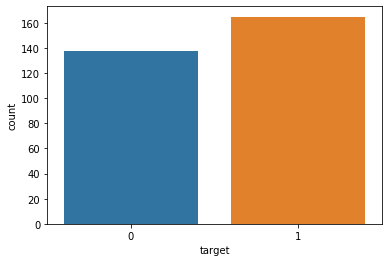

In [6]:
sns.countplot(x = "target", data = df)
plt.show()

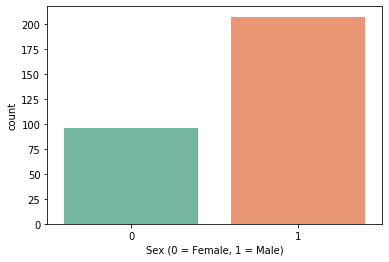

In [7]:
sns.countplot(x = "sex" , data = df, palette = "Set2")
plt.xlabel("Sex (0 = Female, 1 = Male)")
plt.show()

In [8]:
df.groupby("target").mean()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
target,,,,,,,,,,,,,
0,56.601449,0.826087,0.478261,134.398551,251.086957,0.159420,0.449275,139.101449,0.550725,1.585507,1.166667,1.166667,2.543478
1,52.496970,0.563636,1.375758,129.303030,242.230303,0.139394,0.593939,158.466667,0.139394,0.583030,1.593939,0.363636,2.121212


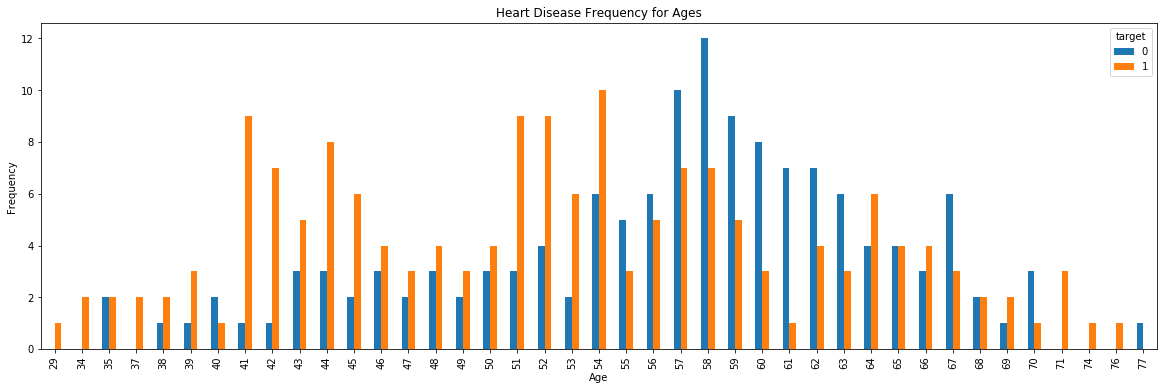

In [9]:
pd.crosstab(df.age,df.target).plot(kind="bar",figsize=(20,6))
plt.title('Heart Disease Frequency for Ages')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.savefig('heartDiseaseAndAges.png')
plt.show()

# creating a crosstab to visualize occurance of heart diesease over age groups and sex

Text(0, 0.5, 'Cholestoral levels')

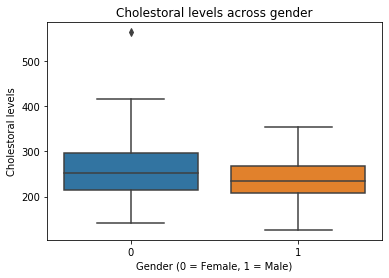

In [14]:
# Exploring cholestoral in relation to heart disease across men and women

sns.boxplot(x = "sex", y = "chol", data = df)
plt.title("Cholestoral levels across gender")
plt.xlabel("Gender (0 = Female, 1 = Male)")
plt.ylabel("Cholestoral levels")


([<matplotlib.axis.XTick at 0x1a204dc4a8>,
 <a list of 8 Text xticklabel objects>)

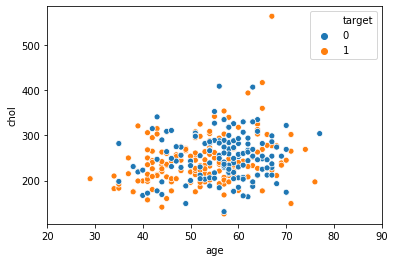

In [41]:
# exploring relationship between age, cholestoral and heart disease

sns.scatterplot(x = "age", y = "chol", hue = "target", data = df,)
plt.xticks(np.arange(20,99,10))

# slight positive correlation between age and cholestoral levels

Text(26.411744791666678, 0.5, 'proportion of heat disease')

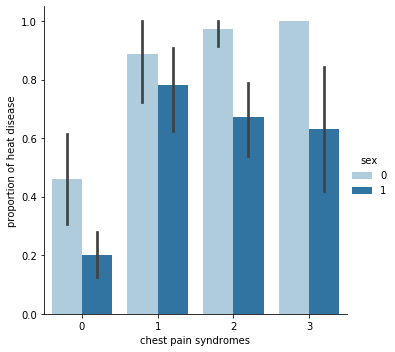

In [49]:
sns.catplot(x = "cp", y = "target", hue = "sex", kind = "bar", data = df)
plt.xlabel("chest pain syndromes")
plt.ylabel("proportion of heat disease")

# different type of chest pain syndromes and occurance of heart disease across sex

In [3]:
new_df = pd.get_dummies(df, columns = ["thal"])

# creating a new data frame with dummies for the categorical values

In [4]:
new_df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,target,thal_0,thal_1,thal_2,thal_3
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,0,1,0,0
1,37,1,2,130,250,0,1,187,0,3.5,0,0,1,0,0,1,0
2,41,0,1,130,204,0,0,172,0,1.4,2,0,1,0,0,1,0
3,56,1,1,120,236,0,1,178,0,0.8,2,0,1,0,0,1,0
4,57,0,0,120,354,0,1,163,1,0.6,2,0,1,0,0,1,0


In [80]:
x = np.array(new_df.drop(["target"], 1))
x.reshape(-1, len(x))
x = preprocessing.scale(x)

In [81]:
y = np.array(new_df["target"])
print(len(x), print(len(y)))

303
303 None


In [82]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.2)

In [60]:
clf = LogisticRegression()
clf.fit(x_train, y_train)

/Users/BoomDizzle/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [90]:
acc = {}
    
clf = LogisticRegression()
clf.fit(x_train, y_train)
score = clf.score(x_test, y_test)
print(score)


0.8360655737704918


/Users/BoomDizzle/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [94]:
clf2 = MeanShift()
clf2.fit(x)

# using clustering to see what groupings the algorithm will create

MeanShift(bandwidth=None, bin_seeding=False, cluster_all=True, min_bin_freq=1,
          n_jobs=None, seeds=None)

In [98]:
labels = clf2.labels_

cluster_centers = clf2.cluster_centers_

orig_df = pd.DataFrame(new_df).copy()


     age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
0     63    1   3       145   233    1        0      150      0      2.3   
1     37    1   2       130   250    0        1      187      0      3.5   
2     41    0   1       130   204    0        0      172      0      1.4   
3     56    1   1       120   236    0        1      178      0      0.8   
4     57    0   0       120   354    0        1      163      1      0.6   
5     57    1   0       140   192    0        1      148      0      0.4   
6     56    0   1       140   294    0        0      153      0      1.3   
7     44    1   1       120   263    0        1      173      0      0.0   
8     52    1   2       172   199    1        1      162      0      0.5   
9     57    1   2       150   168    0        1      174      0      1.6   
10    54    1   0       140   239    0        1      160      0      1.2   
11    48    0   2       130   275    0        1      139      0      0.2   
12    49    

In [103]:
n_clusters = len(np.unique(labels))

orig_df["cluster_group"] = np.nan


for i in range(len(x)):
    orig_df["cluster_group"].iloc[i] = labels[i]
    



0
1
2
3
4


In [111]:
heart_disease_rate = {}

for i in range(n_clusters):
    curr_df = orig_df[(orig_df["cluster_group"] == float(i))]
    prop_heart_disease = len(curr_df[(curr_df["target"] == 1)]) / len(orig_df)
    
    heart_disease_rate[i] = prop_heart_disease

print(heart_disease_rate)

# proportion of heart disease across clusters

{0: 0.5379537953795379, 1: 0.0033003300330033004, 2: 0.0, 3: 0.0033003300330033004, 4: 0.0}


In [119]:
orig_df[(orig_df["cluster_group"] == 0)].describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,target,thal_0,thal_1,thal_2,thal_3,cluster_group
count,294.000000,294.000000,294.000000,294.000000,294.000000,294.000000,294.000000,294.000000,294.000000,294.000000,294.000000,294.000000,294.000000,294.0,294.000000,294.000000,294.000000,294.0
mean,54.316327,0.683673,0.972789,131.649660,244.765306,0.146259,0.520408,149.982993,0.323129,1.010884,1.414966,0.717687,0.554422,0.0,0.044218,0.564626,0.391156,0.0
std,9.095170,0.465835,1.034857,17.618339,47.622907,0.353968,0.520493,23.014086,0.468469,1.137816,0.610975,1.007765,0.497877,0.0,0.205929,0.496651,0.488841,0.0
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0
25%,47.250000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,136.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.650000,1.000000,0.000000,1.000000,0.0,0.000000,1.000000,0.000000,0.0
75%,61.000000,1.000000,2.000000,140.000000,274.000000,0.000000,1.000000,167.750000,1.000000,1.600000,2.000000,1.000000,1.000000,0.0,0.000000,1.000000,1.000000,0.0
max,77.000000,1.000000,3.000000,200.000000,417.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,1.000000,0.0,1.000000,1.000000,1.000000,0.0


# Crime Data - Visualization

In [2]:
df = pd.read_csv("crime.csv", encoding = "latin1")

df.head()

,INCIDENT_NUMBER,OFFENSE_CODE,OFFENSE_CODE_GROUP,OFFENSE_DESCRIPTION,DISTRICT,REPORTING_AREA,SHOOTING,OCCURRED_ON_DATE,YEAR,MONTH,DAY_OF_WEEK,HOUR,UCR_PART,STREET,Lat,Long,Location
0,I182070945,619,Larceny,LARCENY ALL OTHERS,D14,808,NaN,2018-09-02 13:00:00,2018,9,Sunday,13,Part One,LINCOLN ST,42.357791,-71.139371,"(42.35779134, -71.13937053)"
1,I182070943,1402,Vandalism,VANDALISM,C11,347,NaN,2018-08-21 00:00:00,2018,8,Tuesday,0,Part Two,HECLA ST,42.306821,-71.060300,"(42.30682138, -71.06030035)"
2,I182070941,3410,Towed,TOWED MOTOR VEHICLE,D4,151,NaN,2018-09-03 19:27:00,2018,9,Monday,19,Part Three,CAZENOVE ST,42.346589,-71.072429,"(42.34658879, -71.07242943)"
3,I182070940,3114,Investigate Property,INVESTIGATE PROPERTY,D4,272,NaN,2018-09-03 21:16:00,2018,9,Monday,21,Part Three,NEWCOMB ST,42.334182,-71.078664,"(42.33418175, -71.07866441)"
4,I182070938,3114,Investigate Property,INVESTIGATE PROPERTY,B3,421,NaN,2018-09-03 21:05:00,2018,9,Monday,21,Part Three,DELHI ST,42.275365,-71.090361,"(42.27536542, -71.09036101)"


In [3]:
df = df.drop(["INCIDENT_NUMBER", "OFFENSE_CODE"], 1)

In [4]:
df.head()

,OFFENSE_CODE_GROUP,OFFENSE_DESCRIPTION,DISTRICT,REPORTING_AREA,SHOOTING,OCCURRED_ON_DATE,YEAR,MONTH,DAY_OF_WEEK,HOUR,UCR_PART,STREET,Lat,Long,Location
0,Larceny,LARCENY ALL OTHERS,D14,808,NaN,2018-09-02 13:00:00,2018,9,Sunday,13,Part One,LINCOLN ST,42.357791,-71.139371,"(42.35779134, -71.13937053)"
1,Vandalism,VANDALISM,C11,347,NaN,2018-08-21 00:00:00,2018,8,Tuesday,0,Part Two,HECLA ST,42.306821,-71.060300,"(42.30682138, -71.06030035)"
2,Towed,TOWED MOTOR VEHICLE,D4,151,NaN,2018-09-03 19:27:00,2018,9,Monday,19,Part Three,CAZENOVE ST,42.346589,-71.072429,"(42.34658879, -71.07242943)"
3,Investigate Property,INVESTIGATE PROPERTY,D4,272,NaN,2018-09-03 21:16:00,2018,9,Monday,21,Part Three,NEWCOMB ST,42.334182,-71.078664,"(42.33418175, -71.07866441)"
4,Investigate Property,INVESTIGATE PROPERTY,B3,421,NaN,2018-09-03 21:05:00,2018,9,Monday,21,Part Three,DELHI ST,42.275365,-71.090361,"(42.27536542, -71.09036101)"


In [5]:
df["SHOOTING"].unique()

array([nan, 'Y'], dtype=object)

In [6]:
df["SHOOTING"].fillna(0, inplace = True)

In [7]:
df["SHOOTING"].unique()

array([0, 'Y'], dtype=object)

In [8]:
df.head()

,OFFENSE_CODE_GROUP,OFFENSE_DESCRIPTION,DISTRICT,REPORTING_AREA,SHOOTING,OCCURRED_ON_DATE,YEAR,MONTH,DAY_OF_WEEK,HOUR,UCR_PART,STREET,Lat,Long,Location
0,Larceny,LARCENY ALL OTHERS,D14,808,0,2018-09-02 13:00:00,2018,9,Sunday,13,Part One,LINCOLN ST,42.357791,-71.139371,"(42.35779134, -71.13937053)"
1,Vandalism,VANDALISM,C11,347,0,2018-08-21 00:00:00,2018,8,Tuesday,0,Part Two,HECLA ST,42.306821,-71.060300,"(42.30682138, -71.06030035)"
2,Towed,TOWED MOTOR VEHICLE,D4,151,0,2018-09-03 19:27:00,2018,9,Monday,19,Part Three,CAZENOVE ST,42.346589,-71.072429,"(42.34658879, -71.07242943)"
3,Investigate Property,INVESTIGATE PROPERTY,D4,272,0,2018-09-03 21:16:00,2018,9,Monday,21,Part Three,NEWCOMB ST,42.334182,-71.078664,"(42.33418175, -71.07866441)"
4,Investigate Property,INVESTIGATE PROPERTY,B3,421,0,2018-09-03 21:05:00,2018,9,Monday,21,Part Three,DELHI ST,42.275365,-71.090361,"(42.27536542, -71.09036101)"


In [9]:
df["SHOOTING"].unique()

array([0, 'Y'], dtype=object)

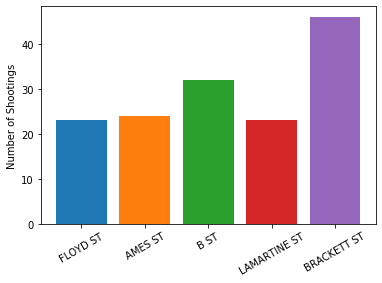

In [10]:
shooting_streets = list(df["STREET"][df["SHOOTING"] == "Y"])
counts = []
streets_unique = list(set(shooting_streets))
streets_unique.pop(0)
top_5 = {}

for street in set(shooting_streets):
    counts.append(shooting_streets.count(street))
    
for i in range(len(streets_unique)):
    if counts[i] > 20:
        top_5[streets_unique[i]] = counts[i]

for street in top_5:
    plt.bar(street, top_5[street])
plt.xticks(rotation=30)
plt.ylabel("Number of Shootings")

plt.show()

# the top 5 streets with the largest occurances of shootings

# Predicting Student Scores - Linear Regression

In [61]:
df = pd.read_csv("/Users/BoomDizzle/Downloads/student/student-por.csv", sep = ";")

In [62]:
df.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,4,0,11,11
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,2,9,11,11
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,6,12,13,12
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,0,14,14,14
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,0,11,13,13


In [63]:
df.columns

Index(['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime',
       'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
       'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc',
       'Walc', 'health', 'absences', 'G1', 'G2', 'G3'],
      dtype='object')

Text(0, 0.5, 'grade')

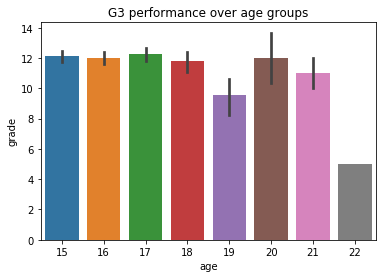

In [74]:
sns.barplot(df["age"], df["G3"])
plt.title("G3 performance over age groups")
plt.xlabel("age")
plt.ylabel("grade")

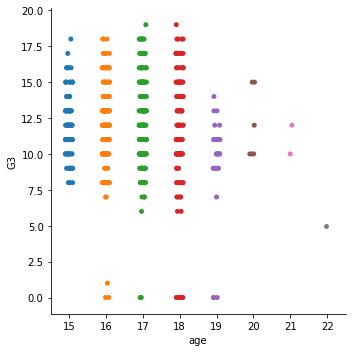

In [78]:
sns.catplot(x = "age", y = "G3", data = df)



Text(0.5, 1.0, 'Distribution of grades')

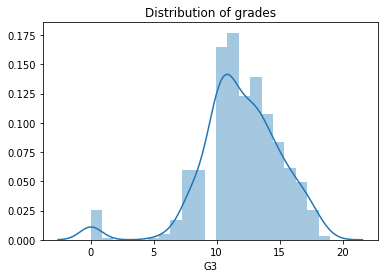

In [81]:
sns.distplot(df["G3"])
plt.title("Distribution of grades")

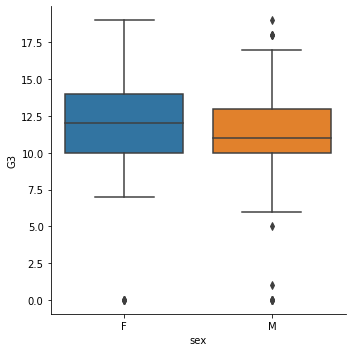

In [84]:
sns.catplot(x = "sex", y = "G3", data = df, kind = "box")

Text(0.5, 1, 'Grades across schools and gender')

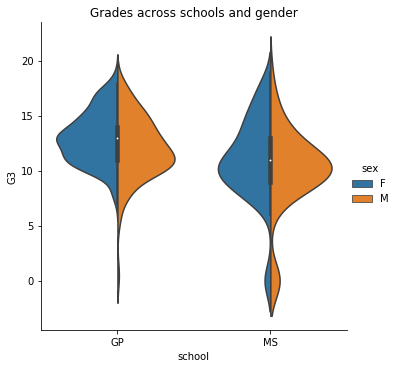

In [88]:
sns.catplot(x = "school", y = "G3", hue = "sex", data = df, kind = "violin", split = True)
plt.title("Grades across schools and gender")

In [91]:
new_df = pd.get_dummies(df)

In [94]:
new_df.head()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,...,activities_no,activities_yes,nursery_no,nursery_yes,higher_no,higher_yes,internet_no,internet_yes,romantic_no,romantic_yes
0,18,4,4,2,2,0,4,3,4,1,...,1,0,0,1,0,1,1,0,1,0
1,17,1,1,1,2,0,5,3,3,1,...,1,0,1,0,0,1,0,1,1,0
2,15,1,1,1,2,0,4,3,2,2,...,1,0,0,1,0,1,0,1,1,0
3,15,4,2,1,3,0,3,2,2,1,...,0,1,0,1,0,1,0,1,0,1
4,16,3,3,1,2,0,4,3,2,1,...,1,0,0,1,0,1,1,0,1,0


In [95]:
new_df.columns

Index(['age', 'Medu', 'Fedu', 'traveltime', 'studytime', 'failures', 'famrel',
       'freetime', 'goout', 'Dalc', 'Walc', 'health', 'absences', 'G1', 'G2',
       'G3', 'school_GP', 'school_MS', 'sex_F', 'sex_M', 'address_R',
       'address_U', 'famsize_GT3', 'famsize_LE3', 'Pstatus_A', 'Pstatus_T',
       'Mjob_at_home', 'Mjob_health', 'Mjob_other', 'Mjob_services',
       'Mjob_teacher', 'Fjob_at_home', 'Fjob_health', 'Fjob_other',
       'Fjob_services', 'Fjob_teacher', 'reason_course', 'reason_home',
       'reason_other', 'reason_reputation', 'guardian_father',
       'guardian_mother', 'guardian_other', 'schoolsup_no', 'schoolsup_yes',
       'famsup_no', 'famsup_yes', 'paid_no', 'paid_yes', 'activities_no',
       'activities_yes', 'nursery_no', 'nursery_yes', 'higher_no',
       'higher_yes', 'internet_no', 'internet_yes', 'romantic_no',
       'romantic_yes'],
      dtype='object')

In [97]:
new_df.drop(["G1", "G2"], 1)

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,...,activities_no,activities_yes,nursery_no,nursery_yes,higher_no,higher_yes,internet_no,internet_yes,romantic_no,romantic_yes
0,18,4,4,2,2,0,4,3,4,1,...,1,0,0,1,0,1,1,0,1,0
1,17,1,1,1,2,0,5,3,3,1,...,1,0,1,0,0,1,0,1,1,0
2,15,1,1,1,2,0,4,3,2,2,...,1,0,0,1,0,1,0,1,1,0
3,15,4,2,1,3,0,3,2,2,1,...,0,1,0,1,0,1,0,1,0,1
4,16,3,3,1,2,0,4,3,2,1,...,1,0,0,1,0,1,1,0,1,0
5,16,4,3,1,2,0,5,4,2,1,...,0,1,0,1,0,1,0,1,1,0
6,16,2,2,1,2,0,4,4,4,1,...,1,0,0,1,0,1,0,1,1,0
7,17,4,4,2,2,0,4,1,4,1,...,1,0,0,1,0,1,1,0,1,0
8,15,3,2,1,2,0,4,2,2,1,...,1,0,0,1,0,1,0,1,1,0
9,15,3,4,1,2,0,5,5,1,1,...,0,1,0,1,0,1,0,1,1,0


In [99]:
x = new_df.drop(["G3"], 1, inplace = False)

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,...,activities_no,activities_yes,nursery_no,nursery_yes,higher_no,higher_yes,internet_no,internet_yes,romantic_no,romantic_yes
0,18,4,4,2,2,0,4,3,4,1,...,1,0,0,1,0,1,1,0,1,0
1,17,1,1,1,2,0,5,3,3,1,...,1,0,1,0,0,1,0,1,1,0
2,15,1,1,1,2,0,4,3,2,2,...,1,0,0,1,0,1,0,1,1,0
3,15,4,2,1,3,0,3,2,2,1,...,0,1,0,1,0,1,0,1,0,1
4,16,3,3,1,2,0,4,3,2,1,...,1,0,0,1,0,1,1,0,1,0
5,16,4,3,1,2,0,5,4,2,1,...,0,1,0,1,0,1,0,1,1,0
6,16,2,2,1,2,0,4,4,4,1,...,1,0,0,1,0,1,0,1,1,0
7,17,4,4,2,2,0,4,1,4,1,...,1,0,0,1,0,1,1,0,1,0
8,15,3,2,1,2,0,4,2,2,1,...,1,0,0,1,0,1,0,1,1,0
9,15,3,4,1,2,0,5,5,1,1,...,0,1,0,1,0,1,0,1,1,0


In [135]:
y = np.array(new_df["G3"])
x = preprocessing.scale(x)
x = np.array(x)

In [136]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.2)

In [109]:
print(len(x_train))
print(len(x_test))

519
130


In [143]:
clf = LinearRegression()

In [144]:
clf.fit(x_train, y_train)
clf.score(x_test, y_test)

0.890563514883448

# Car Data

In [148]:
df = pd.read_csv("/Users/BoomDizzle/Downloads/car.data")

In [154]:
df.columns = ["buying", "maint", "door", "persons", "lug_boot", "safety", "class"]

In [155]:
df.head()

,buying,maint,door,persons,lug_boot,safety,class
0,vhigh,vhigh,2,2,small,med,unacc
1,vhigh,vhigh,2,2,small,high,unacc
2,vhigh,vhigh,2,2,med,low,unacc
3,vhigh,vhigh,2,2,med,med,unacc
4,vhigh,vhigh,2,2,med,high,unacc


In [160]:
le = preprocessing.LabelEncoder()

In [176]:
df["buying"] = le.fit_transform(df["buying"])
df["maint"] = le.fit_transform(df["maint"])
df["lug_boot"] = le.fit_transform(df["lug_boot"])
df["safety"] = le.fit_transform(df["safety"])
df["class"] = le.fit_transform(df["class"])
df["door"] = le.fit_transform(df["door"])
df["persons"] = le.fit_transform(df["persons"])

In [164]:
df.head()

,buying,maint,door,persons,lug_boot,safety,class
0,3,3,2,2,2,2,2
1,3,3,2,2,2,0,2
2,3,3,2,2,1,1,2
3,3,3,2,2,1,2,2
4,3,3,2,2,1,0,2


In [177]:
x = np.array(df.drop(["class"], 1))
y = np.array(df["class"])

In [178]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.2)

In [184]:
clf = SVC()
clf.fit(x_train, y_train)
clf.score(x_test, y_test)

/Users/BoomDizzle/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


0.9248554913294798

In [190]:
c = np.array([3,3,2,2,2,0]).reshape(-1, 6)

clf.predict(c)

array([2])